# **Assignment 2**
---
*   BENC2011: Data Science 
*   Maastricht University, May 2023
*   Marek Chadim i6336489, Alexander Brecht i6244990

##  *Required questions*


### 1. Network size




To determine the network size in terms of the number of nodes, number of edges, and number of connected components, we need to analyze the provided CSV file containing the similarity information between student submissions. We'll use the networkx library in Python to build and analyze the network.

In [77]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community

# Loading the data
df = pd.read_csv("datasets/a2.csv", sep=";", header=0)
display(df.head())
df.info()


,ID1,% in ID1,ID2,% in ID2,number identical lines
0,76,59,27,63,200
1,108,52,52,49,173
2,13,45,38,43,152
3,7,24,36,27,148
4,100,52,81,54,146


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID1                     250 non-null    int64
 1   % in ID1                250 non-null    int64
 2   ID2                     250 non-null    int64
 3   % in ID2                250 non-null    int64
 4   number identical lines  250 non-null    int64
dtypes: int64(5)
memory usage: 9.9 KB


We were tasked to model the dataset as an undirected weighted network, where nodes are student IDs, edges connect student IDs whose submissions had at least 10% overlap in at least one of the end nodes’ submissions,  and the edge weight is given by the number of shared lines of code between two nodes.

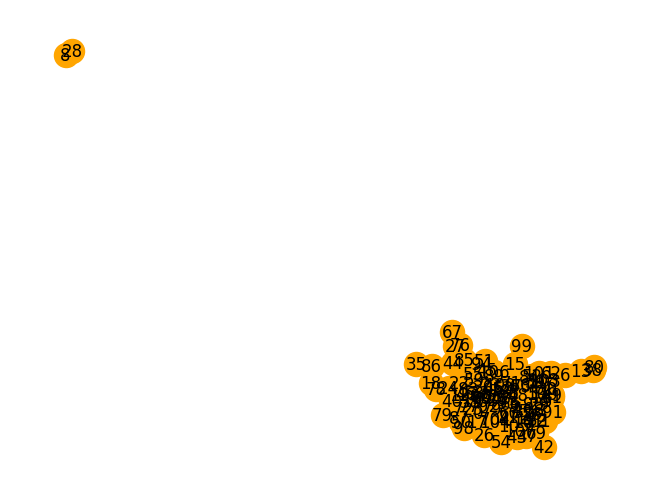

In [78]:
# Modelling an undirected weighted network based on the given criteria
G = nx.Graph()

for index, row in df.iterrows():
    if row['% in ID1'] >= 10 or row['% in ID2'] >= 10:
        G.add_edge(row['ID1'], row['ID2'], weight=row['number identical lines'])

nx.draw(G, with_labels=True, node_color='orange', edge_color='black')
plt.show()

Now that we have constructed the network, we can analyze its properties:

In [79]:
print("Number of nodes:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())
print("Number of connected components:",nx.number_connected_components(G)) 

Number of nodes: 109
Number of edges: 243
Number of connected components: 2


### 2. The distribution of edge weights

To plot the distribution of edge weights in the network, we can use the networkx library along with matplotlib.

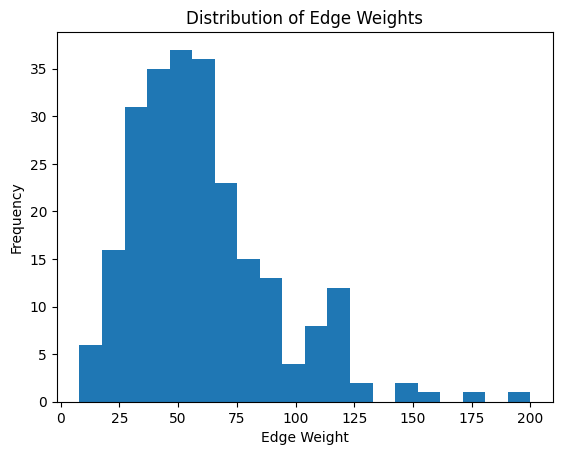

In [80]:
# This code will generate a histogram showing the distribution of edge weights in the network
weights = [c['weight'] for a, b, c in G.edges(data=True)]
plt.hist(weights, bins=20)
plt.xlabel("Edge Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Edge Weights")
plt.show()

The distribution is skewed towards lower edge weights, indicating that most submissions have relatively low code overlap with others. There are a few edges with high weights, representing submissions that have a significant amount of code similarity.

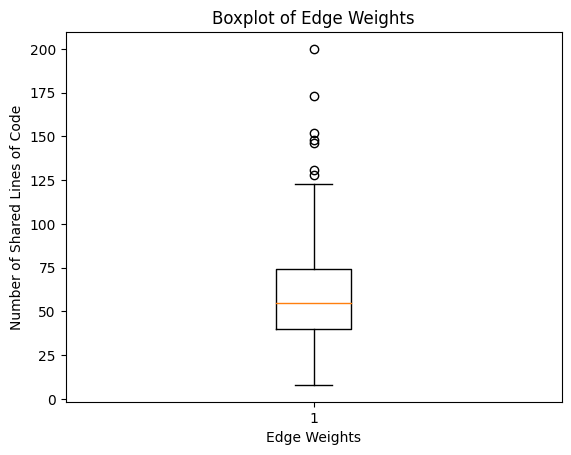

In [81]:
# This code will generate a boxplot illustrating the distribution of edge weights in the network

# Filter the data to include only edges with at least 10% overlap in either direction
filtered_data = df[(df['% in ID1'] >= 10) | (df['% in ID2'] >= 10)]

# Get the edge weights as a list
edge_weights = filtered_data['number identical lines'].tolist()

# Plot the boxplot of edge weights
plt.boxplot(edge_weights)
plt.xlabel('Edge Weights')
plt.ylabel('Number of Shared Lines of Code')
plt.title('Boxplot of Edge Weights')
plt.show()

The outliers suggest presence of submissions with exceptionally high code overlap compared to the majority of submissions.

In [82]:
# Let's get more stats about this graph so we can draw some conlcusions 
print(np.mean(weights))
print(np.median(weights))
print(np.std(weights))
print(np.max(weights), np.min(weights))

60.748971193415635
55.0
30.31709558895422
200 8


 
Looking at the mean being 60,8 we can say there is a share amount of overlap between the nodes i.e the sutdents.

The median is 55 we can graphically see its slight left skewed and there is a significant amount of edges with code overlap.

The standard deviation of the edge weights is 30.34. A higher standard deviation indicates a wider range of variation in the code overlap percentages among the edges.

The max and min simply tell us the range of code overlap

### 3. Node degree distribution

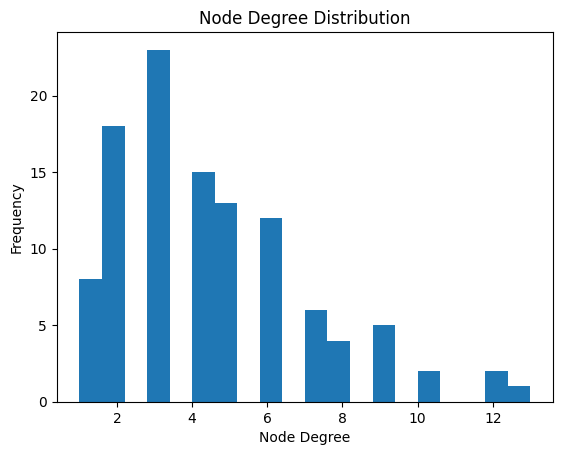

In [83]:
# The code calculates the degree of each node in the graph and creates a histogram of the node degrees. 
degrees = dict(G.degree())
degree_values = list(degrees.values())

plt.hist(degree_values, bins=20)
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.title("Node Degree Distribution")
plt.show()

This visualization helps us understand the distribution of node degrees in the network, providing insights into the connectivity patterns and the presence of hubs or outliers in terms of node degrees. The distribution might follow a power-law or scale-free pattern as there is a small number of nodes with a high degree, indicating a few students with many connections (possibly representing cheating nodes).

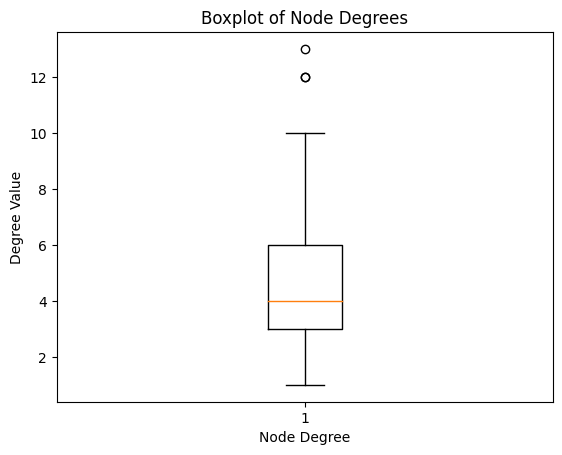

In [84]:
plt.boxplot(degree_values)
plt.xlabel('Node Degree')
plt.ylabel('Degree Value')
plt.title('Boxplot of Node Degrees')
plt.show()

The boxplot provides information about the central tendency, spread, and potential outliers in the distribution of node degrees. Again, the presence of outliers suggests nodes with exceptionally high degrees compared to the majority of nodes.

### 4. Centrality

To determine the most central nodes in the weighted network, we can calculate the centrality of each node using a suitable centrality metric. In the context of this dataset, where the network is defined as an undirected weighted network based on code overlap between student submissions, the centrality metric we consider is the eigenvector centrality because it takes into account both the number and quality (in this case, the weight) of connections that a node has.

In [85]:
# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# Sort the nodes by their eigenvector centrality values
sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)


# Get the most central node
most_central_node = sorted_nodes[0]

print("Most central node:", most_central_node)
print("Eigenvector centrality:", centrality[most_central_node])


Most central node: 7
Eigenvector centrality: 0.41556937818790823


The most central node identified based on eigenvector centrality represents the student ID with the highest centrality score. In the context of this dataset, the role of this most central node can be interpreted as follows:

The most central node has strong connections with other nodes in the network, considering both the number of connections and the quality (weight) of those connections. This suggests that this student's submission shares a significant amount of code with multiple other students. The centrality score indicates that the code submitted by this student is not only similar to many others but also shared with other nodes that themselves have high centrality scores. The most central node likely plays a central role in the network, possibly indicating a potential hub for code sharing or collaboration. This student may have served as a source of code inspiration or collaboration for other students in the course.

In [86]:
# Print the five most central nodes
print("Five most central nodes:")
for node in sorted_nodes[:5]:
    print("Node:", node)
    print("Eigenvector centrality:", centrality[node])
    print()

Five most central nodes:
Node: 7
Eigenvector centrality: 0.41556937818790823

Node: 36
Eigenvector centrality: 0.4036451587240101

Node: 109
Eigenvector centrality: 0.36656582442457925

Node: 65
Eigenvector centrality: 0.30908072971543515

Node: 48
Eigenvector centrality: 0.30762447665420267



We can also plot these nodes

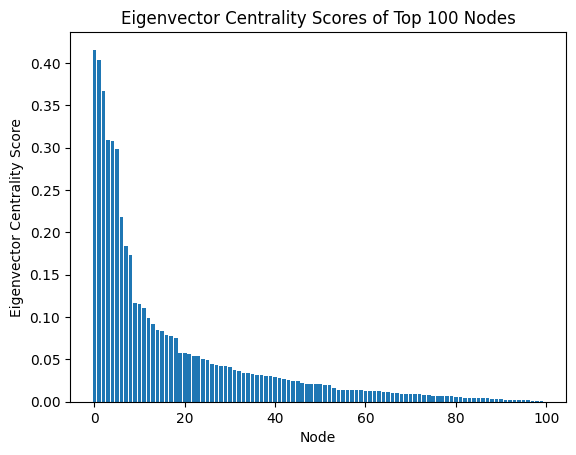

In [87]:
# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# Sort the nodes by their eigenvector centrality values
sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)

# Select the top 10 nodes with the highest eigenvector centrality scores
top_nodes = sorted_nodes[:100]

# Get the centrality scores for the top nodes
top_scores = [centrality[node] for node in top_nodes]

# Plot the centrality scores
plt.bar(range(len(top_nodes)), top_scores)

plt.xlabel("Node")
plt.ylabel("Eigenvector Centrality Score")
plt.title("Eigenvector Centrality Scores of Top 100 Nodes")
plt.show()

It seems only a few nodes tend to have significantly more connections or higher weights than the majority of other nodes.

This is due to the preferential attachment principle: "the more connected a node is, the more likely it is to receive new links"

This is seen in many networks, including social and biological networks. 



### 5. Weights larger than the median

The purpose of this code is to identify and analyze highly connected components in the graph based on edge weights. By calculating the median edge weight and filtering the graph accordingly, it aims to highlight the subsets of nodes that are strongly interconnected. The code provides information about the number of highly connected components and lists the nodes within each component, allowing for a better understanding of the network structure and its significant relationships.

In [88]:
# Calculate the median edge weight
median_edge_weight = np.median(df['number identical lines'])
print("Median edge weight:", median_edge_weight)

# Filter the graph to consider only edges with weights larger than the median
G_sub = nx.Graph((a, b, c) for a, b, c in G.edges(data=True) if c['weight'] > median_edge_weight)

# Number of connected components in the filtered graph
num_filtered_components = nx.number_connected_components(G_sub)

# List of nodes in each connected component
filtered_components = list(nx.connected_components(G_sub))

# Print the number of connected components and the list of nodes in each component
print("Number of highly connected components:", num_filtered_components)
for i, component in enumerate(filtered_components):
    print("Component", i+1, ":", component)

Median edge weight: 54.5
Number of highly connected components: 7
Component 1 : {0, 1, 2, 3, 5, 7, 9, 10, 11, 14, 15, 16, 17, 18, 19, 23, 24, 25, 27, 30, 32, 34, 36, 37, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 84, 85, 88, 89, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 106, 107, 108, 109}
Component 2 : {80, 13, 38}
Component 3 : {90, 29}
Component 4 : {26, 70, 40, 104, 12, 22, 58, 60}
Component 5 : {62, 6}
Component 6 : {35, 86}
Component 7 : {105, 43}


The number of connected components represents distinct groups or clusters of nodes in the network that are interconnected through shared lines of code. By considering only edges with weights larger than the median, we focus on the connections that exhibit a higher number of shared lines of code, indicating a stronger similarity or potential collaboration.

The list of nodes in each connected component provides insights into the groups of students who have significant code overlap, possibly indicating collaboration or sharing of solutions. By disregarding singletons (nodes with no connections), we exclude individual nodes that do not exhibit substantial code similarity with other students.

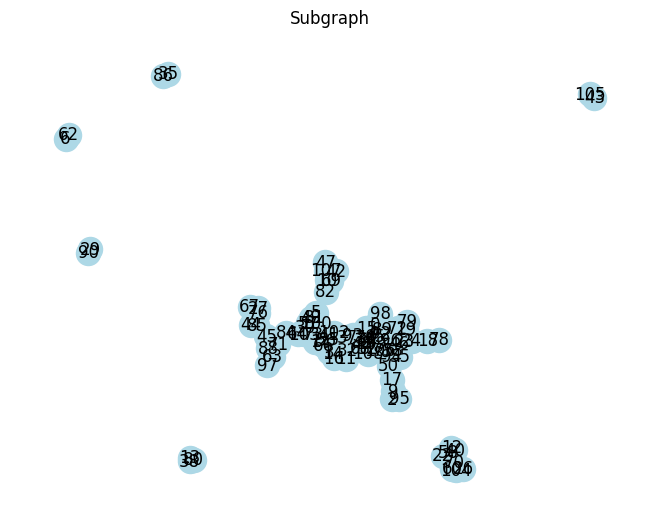

In [89]:
# Plot the subgraph
pos = nx.spring_layout(G_sub)
nx.draw(G_sub, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Subgraph')
plt.show()

### 6. Diameters

The diameter represents the maximum shortest path length between any pair of nodes in a component or network.

In [90]:
# Diameter of the components from the original network
components = nx.connected_components(G)
component_diameters = []

for component in components:
    subgraph = G.subgraph(component)
    diameter = nx.diameter(subgraph)
    component_diameters.append(diameter)

print("Component diameters (original network):", component_diameters)

Component diameters (original network): [8, 1]


In [91]:
# Diameter of the components from the network extracted for the subgraph
filtered_components = nx.connected_components(G_sub)

filtered_component_diameters = []

for component in filtered_components:
    subgraph = G_sub.subgraph(component)
    diameter = nx.diameter(subgraph)
    filtered_component_diameters.append(diameter)

print("Component diameters (filtered network):", filtered_component_diameters)

Component diameters (filtered network): [14, 1, 1, 3, 1, 1, 1]


The diameter of the original network represents the maximum shortest path length between any pair of nodes in the entire network. It gives an understanding of the overall span or reachability of the network in terms of shared lines of code.

The diameter of the subgraph extracted from the original network represents provides insights into the clustering and interconnectedness of nodes with significant code overlap.

By comparing the diameters, we can observe the difference in the spread and connectedness between the entire network and the main cluster identified through the subgraph analysis. A larger diameter  of the latter indicates a wider reach and potential for collaboration or code sharing across the network or within the identified cluster.

## *Further exploration*

### 1. Bridges and cliques


Which nodes act as bridges between different clusters in the network? Identifying bridge nodes can help us understand the connections between different clusters and potentially reveal key nodes facilitating communication or code sharing between distinct groups


In [92]:
# Calculate the bridge nodes in the graph
bridge_nodes = list(nx.bridges(G))
# Print the bridge nodes
print("Bridge Nodes:", bridge_nodes)


Bridge Nodes: [(76, 67), (36, 15), (65, 89), (72, 79), (69, 42), (70, 26), (15, 99), (28, 8)]


 The identified bridge nodes represent critical connections between different clusters in the network. These nodes play a significant role in maintaining connectivity and facilitating the exchange of code between otherwise separate groups. 

 A clique is a subset of nodes in a graph where every pair of nodes is directly connected by an edge. In other words, a clique is a fully connected subgraph within a larger graph. Analyzing cliques in the network can provide valuable insights into groups of nodes that have dense connections among themselves. 

In [93]:
# Find all maximal cliques in the network
cliques = nx.find_cliques(G)

# Get the sizes of the maximal cliques
clique_sizes = [len(clique) for clique in cliques]

# Sort the clique sizes in descending order
sorted_sizes = sorted(clique_sizes, reverse=True)

# Print the sizes of the largest cliques
print("Sizes of the Largest Cliques:")
for size in sorted_sizes[:5]:
    print(size)

Sizes of the Largest Cliques:
6
5
5
4
4


The sizes of the largest cliques indicate the number of nodes within those densely connected groups. 

{5, 30, 49, 57, 81, 100}

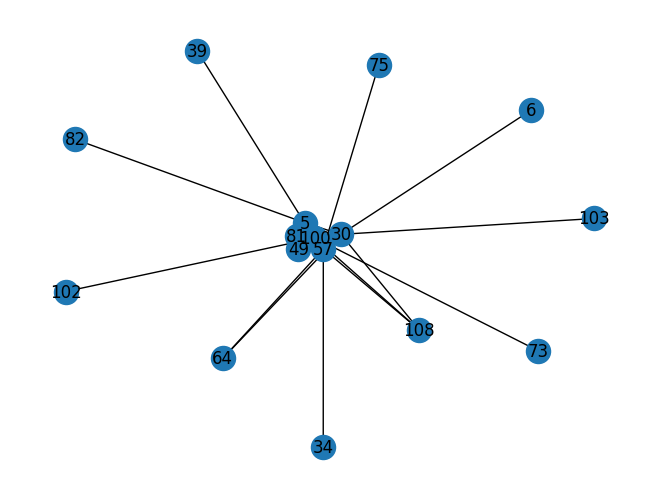

In [94]:
# Identify the largest maximal clique: largest_max_clique
list(nx.find_cliques(G))
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])
display(largest_max_clique)

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

nx.draw(G_lmc, with_labels=True)

### 2. Different centrality metrics

By analyzing different centrality measures, we can gain insights into the key nodes and their roles in the network.

Degree centrality measures the number of edges connected to a node, indicating its importance in terms of direct connections. Nodes with high degree centrality often act as key hubs or connectors in the network.

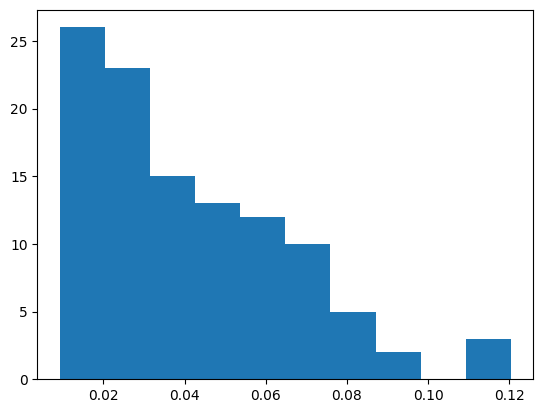

In [95]:
degree_centrality = nx.degree_centrality(G)
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

 Betweenness centrality measures the extent to which a node lies on the shortest paths between pairs of nodes in the network. Nodes with high betweenness centrality often act as bridges or intermediaries, controlling the flow of information between different parts of the network.

In [96]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sort the nodes by betweenness centrality in descending order
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most central nodes based on betweenness centrality
top_nodes = sorted_nodes[:5]
for node, centrality in top_nodes:
    print("Node:", node, "- Betweenness Centrality:", centrality)

Node: 34 - Betweenness Centrality: 0.13227590994172875
Node: 65 - Betweenness Centrality: 0.10476116000980365
Node: 96 - Betweenness Centrality: 0.09191327928487088
Node: 73 - Betweenness Centrality: 0.08849856057009878
Node: 48 - Betweenness Centrality: 0.08618551993765787


The nodes with the highest betweenness centrality act as important intermediaries or bridges in the network. They have significant control over the flow of information or code sharing between different groups or clusters in the network. Removing these nodes may disrupt the connectivity and communication within the network.

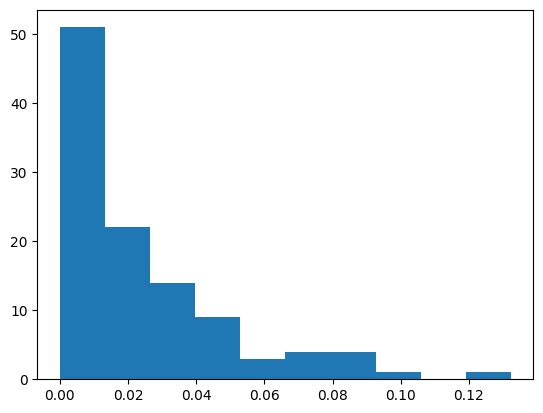

In [97]:
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

The scatter plot of degree centrality vs. betweenness centrality allows us to examine the relationship between these two centrality measures for the nodes in the network. Each data point on the scatter plot represents a node, and its position is determined by its degree centrality on the x-axis and its betweenness centrality on the y-axis.

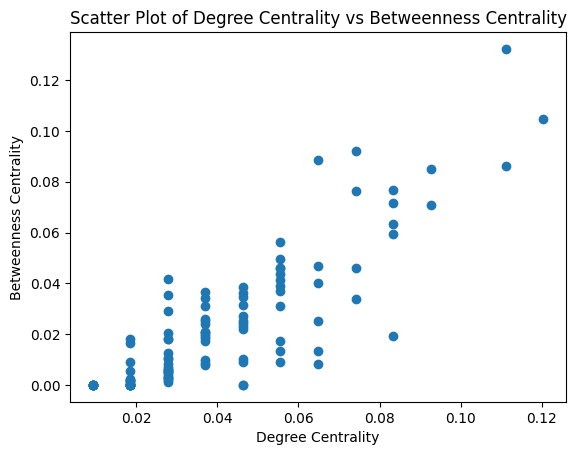

In [98]:
# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(degree_centrality.values()),list(betweenness_centrality.values()))

# Display the plot
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.title("Scatter Plot of Degree Centrality vs Betweenness Centrality")
plt.show()

 Nodes with high values of both degree centrality and betweenness centrality play a dual role as both local hubs and connectors between different parts of the network. These nodes have significant influence within their neighborhoods and serve as important communication channels between different clusters.

### 3. Central node subgraph




To perform a central node subgraph analysis, we can identify the most central node(s) based on a centrality metric and extract a subgraph containing those central nodes and their adjacent nodes. This analysis allows us to focus on the immediate neighborhood of the central nodes and explore their connectivity and relationships.

In [99]:
# Calculate eigenvector centrality for all nodes
eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# Find the most central node(s) based on eigenvector centrality
central_nodes = [node for node, centrality in eigenvector_centrality.items() if centrality == max(eigenvector_centrality.values())]

print("Most central node(s) based on degree centrality:", central_nodes)

Most central node(s) based on degree centrality: [7]


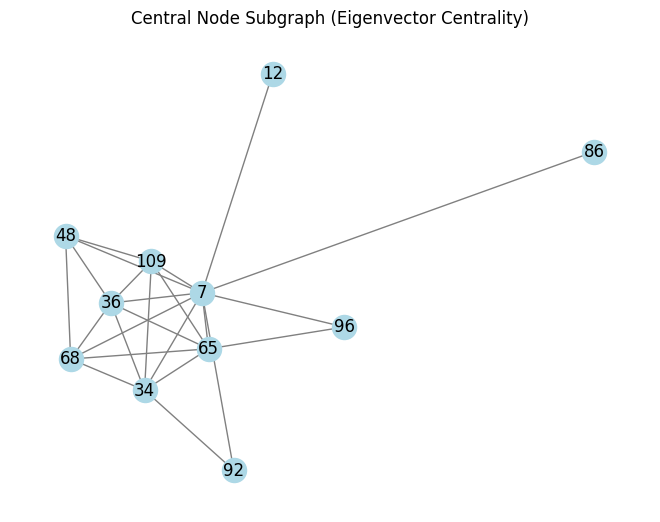

In [100]:
# Create a subgraph of the central nodes and their adjacent nodes
subgraph_nodes = central_nodes + list(G.neighbors(central_nodes[0]))
subgraph = G.subgraph(subgraph_nodes)

# Plot the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Central Node Subgraph (Eigenvector Centrality)')
plt.show()

By plotting the subgraph, we can observe the relationships and interactions among the central node(s) and their adjacent nodes.

To analyze the subgraph, we can explore various network properties and metrics to gain insights into its structure and characteristics.



In [101]:
# Perform analysis on the subgraph

# Network Density
density = nx.density(subgraph)
print("Subgraph Density:", density)

# Node Centralities
degree_centrality = nx.degree_centrality(subgraph)
highest_degree_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
print("Nodes with Highest Degree Centrality:", highest_degree_nodes)

betweenness_centrality = nx.betweenness_centrality(subgraph)
highest_betweenness_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
print("Nodes with Highest Betweenness Centrality:", highest_betweenness_nodes)

eigenvector_centrality = nx.eigenvector_centrality(subgraph)
highest_eigenvector_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
print("Nodes with Highest Eigenvector Centrality:", highest_eigenvector_nodes)

# Clustering Coefficient
clustering_coefficient = nx.average_clustering(subgraph)
print("Subgraph Clustering Coefficient:", clustering_coefficient)



Subgraph Density: 0.43636363636363634
Nodes with Highest Degree Centrality: [7, 65, 34, 36, 68]
Nodes with Highest Betweenness Centrality: [7, 65, 34, 36, 68]
Nodes with Highest Eigenvector Centrality: [7, 36, 65, 34, 68]
Subgraph Clustering Coefficient: 0.6252525252525252


By calculating the network density, we can determine how densely connected the subgraph is, which can indicate the level of interaction and collaboration among its nodes. Higher density implies a more interconnected subgraph.

Analyzing different centrality measures (e.g., degree centrality, betweenness centrality, and eigenvector centrality) helps identify the most central nodes within the subgraph. These central nodes are likely to have a significant influence, play crucial roles in information flow or act as bridges between different parts of the subgraph.

The clustering coefficient provides information about the tendency of nodes within the subgraph to form clusters or groups. A higher clustering coefficient suggests that nodes in the subgraph are more likely to be

### 4. Visualisations 

Lets look at the degree distribution using code from NetworkX library 


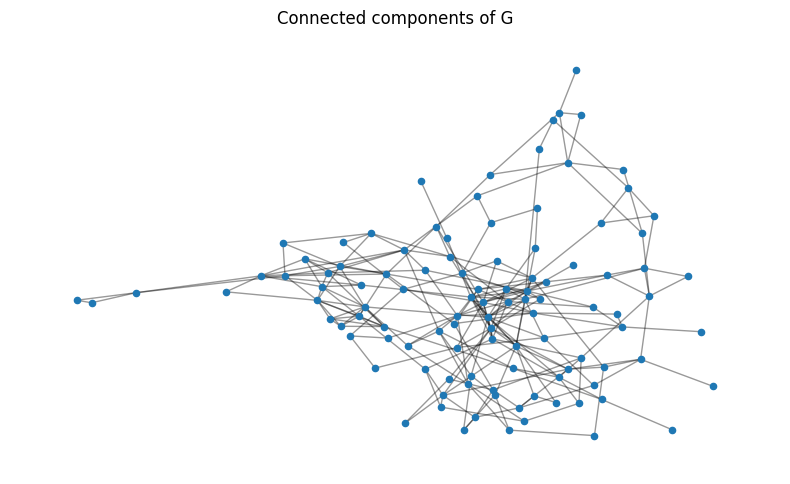

In [102]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()
fig.tight_layout()
plt.show()

Lets try to detect communites 

We are using the greedy modularity algorithm to detect communities in the graph, assigning each node a community label. We then visualize the graph, coloring the nodes based on their community assignments.

We're excluding the nodes 28 and 8 to better visualize the communites. Considering they're outliers and not part of the connected components we're creating a new_graph to help with the visualization. 

In [103]:
outliers = [28, 8]
# new graph excluding the outliers
new_graph = G.subgraph([node for node in G.nodes() if node not in outliers])


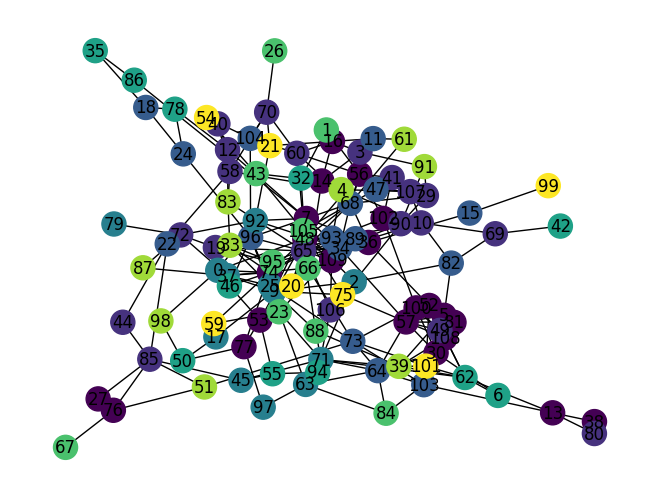

In [104]:

#Detect communities using the greedy modularity approach on the new graph

communities = nx.algorithms.community.greedy_modularity_communities(new_graph)


node_colors = []
for i, comm in enumerate(communities):
    node_colors.extend([i] * len(comm))


pos = nx.spring_layout(new_graph)
nx.draw(new_graph, pos, node_color=node_colors, with_labels=True)


plt.show()


Let's now try to look more closely at these communites 

In [105]:
# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Print community sizes
for i, community_size in enumerate(community_sizes):
    print(f"Community {i+1} size: {community_size}")

Community 1 size: 22
Community 2 size: 20
Community 3 size: 16
Community 4 size: 12
Community 5 size: 11
Community 6 size: 10
Community 7 size: 9
Community 8 size: 7


Let's focus on the communites with more than = 10 nodes

In [106]:

community_indices = [0, 1, 2, 3, 4, 5]  

# Iterate over the selected communities
for community_index in community_indices:
    community = communities[community_index]  

    # Create a subgraph for the current community
    community_subgraph = G.subgraph(community)

    # Calculate degree centrality for nodes in the community subgraph
    degree_centrality = nx.degree_centrality(community_subgraph)

    # Find the node with the highest degree centrality
    most_important_node = max(degree_centrality, key=degree_centrality.get)

    print("Community", community_index + 1)
    print("Most important node:", most_important_node)


Community 1
Most important node: 30
Community 2
Most important node: 48
Community 3
Most important node: 10
Community 4
Most important node: 3
Community 5
Most important node: 37
Community 6
Most important node: 85



When focusing on the identified communities, we observe that each community has a most important node. These nodes, such as node 30 in Community 1 and node 48 in Community 2, play significant roles within their respective communities and may exhibit higher influence or connectivity compared to other nodes.


### Small-world phenomena 

We've all heard the saying "oh what a small world" 

The small world phenomena refers the principle that people can be linked by a short chain of acquaintances, or "6 degrees of seperation"

We'd like to explore if this phenomena is present in our network. 

In [107]:
# We start by calculation the average shortest path 
# We use new graph to exlude the outliers since in order to calculate shortes path, G has to be connected. 

print(nx.average_shortest_path_length(new_graph))


3.6388643978134367


We observe that the average shortest path length in the network is 3.6. This indicates that, on average, it takes approximately 3.6 steps to connect any two students, regardless of whether they are from year 1 or year 2. These findings support the notion of a small-world phenomenon, suggesting a relatively close interconnectedness among the students.
This can conclude our suspision that maastricht is indeed a small city.(Although we're not taking in consideration everyone in maastricht, however it be intersting to analyse)

Clustering Coefficient: 0.2549922559268353
Random Network Clustering Coefficient: 0.029854620976116308


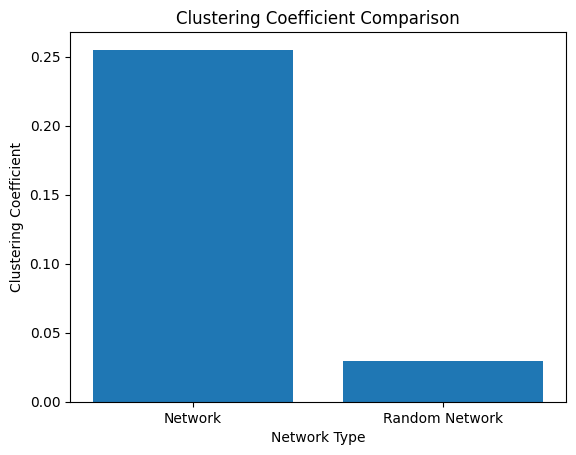

In [108]:
# Next we'd like to see how clustered the network is when compared to a random network

# Create a random graph
random_graph = nx.gnm_random_graph(n=len(new_graph.nodes), m=len(new_graph.edges))


clustering_coefficient = nx.average_clustering(new_graph)
random_clustering_coefficient = nx.average_clustering(random_graph)
print("Clustering Coefficient:", clustering_coefficient)
print("Random Network Clustering Coefficient:", random_clustering_coefficient)

# We can plot the coefficents
labels = ['Network', 'Random Network']
values = [clustering_coefficient, random_clustering_coefficient]

plt.bar(labels, values)
plt.xlabel('Network Type')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient Comparison')
plt.show()


The clustering coefficient of 0.255 indicates a moderate level of local clustering in the network, suggesting the presence of clusters or groups of interconnected nodes. The comparison with the random network's clustering coefficient of 0.037 further supports the small-world phenomenon, as the actual network exhibits significantly higher clustering, indicating a higher degree of local interconnectedness.